In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import InputExample, InputFeatures
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
df = pd.read_csv("D:/datasets/tweets.csv") 
print(df.columns)

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
X = list(df['text'].values)
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128, return_tensors='tf')


In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test)).batch(8)


In [11]:
0from transformers import create_optimizer
optimizer, _ = create_optimizer(init_lr=2e-5, num_train_steps=1000, num_warmup_steps=100)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(train_dataset, epochs=1)



1137/1137 [==============================] - 10580s 9s/step - loss: 0.2760 - accuracy: 0.8862


In [16]:
y_pred_logits = model.predict(test_dataset).logits
y_pred = tf.math.argmax(y_pred_logits, axis=1).numpy()

285/285 [==============================] - 964s 3s/step


Accuracy: 0.9076517150395779


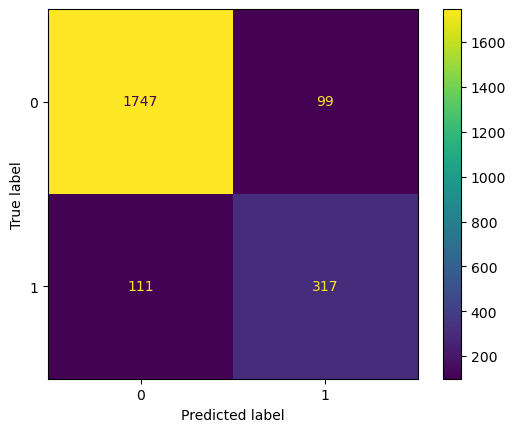

In [17]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()